In [10]:
import os
import sys
import numpy as np
import pylab as pl

%pylab inline

from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05
 
 $H_0: P_0 - P_1 \geq$ 0

 $H_a: P_0 - P_1 $< 0

 $\alpha$ = 0.05

this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above):

 $P_0=0.035, P_1=0.701$

In [11]:
# choosing my significance threshhold
alpha=0.05

# changing percentages to fractions
# 0 for control group, 1 for program group

P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

if P_0 - P_1 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

#sample sizes 

n_0 = 409
n_1 = 564
    
#lets get the counts by multiplying by the sample size

Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

we must assess the statistical significance


WHICH TEST?
samples, categorical data

TWO OPTIONS z test, or chi-square test.

STARTING WITH THE Z TEST
the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the assumption of normality

In [12]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.4210472764645426


In [13]:
# I am goonna create a little one line function to calculate the standard error
# and to calculate p

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))

In [14]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_2y)

20.7697865408


note that using p0-p1 or p1-p0 at the numerator is equivalent because the standardizes normal value of z has mean 0 (see image below) so that we can use the absolute value of the z score, or equivalently look for $P[Z&lt;z]$ if z is positive, and $P[Z&gt;z]$ if z is negative.

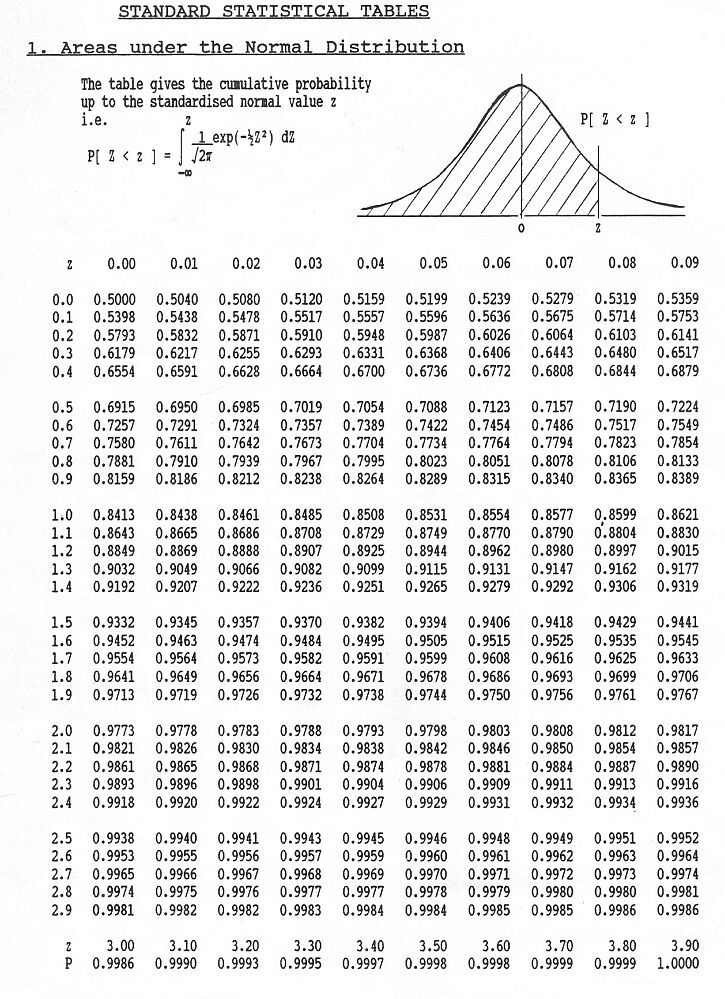

In [15]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

if $p&lt;\alpha$ : reject H0 **
IMPORTANT!! note that this P in the bottom line of the table is not the p-value, but

p-value = 1-P

In [16]:
## p-value for employment after 2 years: 
## since the largest number we read off the table for is (way) smaller 
## than the value for our statistic 
## our p-value will be smaller than it would be if calculated using 
## (e.g.) .9998 (and in fact using 1.0000 which is the largest number 
## in the table). Using 0.9998 is a **conservative** approach. 

p_2y = 1 - 0.9984


def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_2y, alpha)

is the p value 0.00 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected
